
This project analyzes real-world housing transaction data from Beijing using Python. It involves data cleaning, outlier removal, feature construction, and spatial-temporal visualizations to extract meaningful insights.

In [1]:
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk')
housing

C:\Users\Asus\AppData\Local\Temp\ipykernel_16088\2056714471.py:2: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,350.0,170.07,...,1,2,中 5,2003,1,6,0.333,0.0,0.0,3
318847,318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,108.8,35.09,...,1,1,中 24,2009,1,6,0.222,1.0,1.0,3
318848,318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,359.0,102.17,...,1,2,中 7,2000,3,6,0.500,1.0,0.0,3
318849,318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,720.0,178.34,...,1,2,中 5,2003,4,2,0.500,0.0,0.0,3


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
اکنون نگاهی به تعداد سطر و ستون مجموعه‌داده بیندازیم:
</font>
</p>

In [65]:
housing.shape

(318851, 22)

In [67]:
housing_dropped = housing.drop(columns=['Cid','id','url','Unnamed: 0'])
housing_dropped 

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,中 5,2003,1,6,0.333,0.0,0.0,3
318847,116.497474,39.810115,2016-06-10,NaN,108.8,35.09,1,0,1,1,中 24,2009,1,6,0.222,1.0,1.0,3
318848,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,中 7,2000,3,6,0.500,1.0,0.0,3
318849,116.501794,39.799347,2016-06-12,NaN,720.0,178.34,4,2,1,2,中 5,2003,4,2,0.500,0.0,0.0,3


### Step 1: Missing Values Check  
Identify and summarize missing values in the dataset after dropping irrelevant columns to prepare for data cleaning.


In [68]:
housing_null1 = housing_dropped.isna().sum()


housing_null1 = housing_dropped.isna().sum()
housing_null= pd.DataFrame(housing_null1.values, index=housing_null1.index, columns=[0])
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


### Step 2: Handling Missing Values in the `DOM` Column  
The `DOM` (Days on Market) column contains many missing values, and dropping them would eliminate almost half of the dataset. Since this column holds valuable information, we aim to impute its missing values instead of removing it.

To decide on a suitable imputation strategy (mean or mode), we visualize the distribution using a boxplot:

<Axes: >

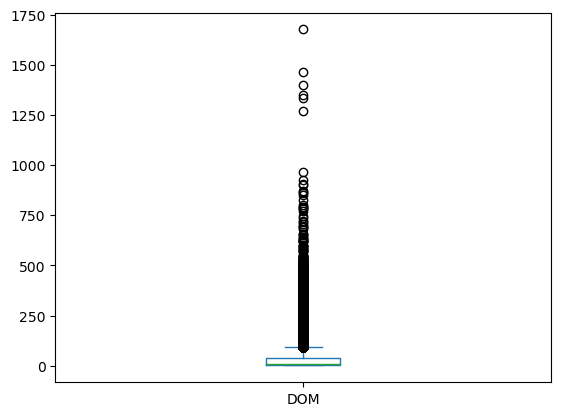

In [69]:
housing_dropped.DOM.plot(kind = 'box')

In [70]:
housing_no_missing = housing_dropped.copy()
housing_no_missing

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,中 5,2003,1,6,0.333,0.0,0.0,3
318847,116.497474,39.810115,2016-06-10,NaN,108.8,35.09,1,0,1,1,中 24,2009,1,6,0.222,1.0,1.0,3
318848,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,中 7,2000,3,6,0.500,1.0,0.0,3
318849,116.501794,39.799347,2016-06-12,NaN,720.0,178.34,4,2,1,2,中 5,2003,4,2,0.500,0.0,0.0,3


### Step 3: Final Data Cleaning  
In this step, we impute and clean the remaining missing values:

- Replace missing values in the `DOM`  column with its mode, as it best represents the most common listing duration.  
- Drop rows where either `elevator` or `subway` values are missing, since they are essential features for further analysis.


In [71]:

housing_no_missing['DOM'].fillna(float(housing_no_missing['DOM'].dropna().mode()),inplace=True)
housing_no_missing = housing_no_missing.dropna(subset=['elevator', 'subway'],how='any')
housing_no_missing

C:\Users\Asus\AppData\Local\Temp\ipykernel_13720\1831565189.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  housing_no_missing['DOM'].fillna(float(housing_no_missing['DOM'].dropna().mode()),inplace=True)


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,中 5,2003,1,6,0.333,0.0,0.0,3
318847,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,中 24,2009,1,6,0.222,1.0,1.0,3
318848,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,中 7,2000,3,6,0.500,1.0,0.0,3
318849,116.501794,39.799347,2016-06-12,1.0,720.0,178.34,4,2,1,2,中 5,2003,4,2,0.500,0.0,0.0,3


In [73]:
housing_no_missing.to_csv('housing_no_missing.csv', encoding='gbk', index=False)